<a href="https://colab.research.google.com/github/melrepa/Proyecto-Integrador-Ing-Car/blob/main/Proyecto3_MelissaReyesPaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 3. Un proceso de ingeniería de características

Universidad de Sonora

Maestría en Ciencia de Datos

Ingeniería de Características

Dr. Julio Waissman Vilanova

Melissa Reyes Paz

Hermosillo, Sonora. Noviembre de 2022

***

**Instrucciones:** 

Como proyecto final vamos a tener un proceso simple pero completo de ingeniería de características. El proyecto debe constar con las siguientes fases:

1. Una descripción del problema que se busca resolver (la parte del modelado o la presentación del producto final no nos interesa por el momento pero se debe tener claras las intenciones para las cuales se realiza la ingeniería de características)
2. Obtención de la información usando al menos dos fuentes diferentes. Recopilación de la información cruda (raw data) en forma reproducible.
3. Limpieza de datos, la cual debe incluir:
    1. Armonización de variables.
    2. Manejo correcto y codificación de datos cuantitativos, cualitativos, fechas y horas.
    3. Manejo de valores perdidos.
    4. Detección y manejo de valores anómalos.
4. Análisis exploratorio de datos, que utilice:
    1. Métodos de agregación.
    2. Suavizado para series de tiempo o manejo de datos georeferenciados.
    3. Al menos un método de reducción de características (PCA, t-SNE,…).
5. Generación de un conjunto de datos arreglados (tidy data), para lo que es necesario:
    1. Un script (R o python) de limpieza básica que lea los datos crudos y devuelva los datos acomodados.
    2. Los datos en forma tidy, ya sea en csv, parquet, o SQlite.
    3. Un diccionario de datos especificando las descripciones de cada atributo y sus unidades
6. Visualización de los datos.

***


En este reporte se abordan los puntos del 1 al 4. 
El punto 5 se encuentra en el script de python disponible [aquí](). 
El punto 6 está disponible en un [dashboard]() elaborado en Tableau Public.

Todos los archivos e información referente al proyecto están disponibles en un [Repositorio de GitHub](https://github.com/melrepa/Proyecto-Integrador-Ing-Car).

El proyecto cuenta con una página de GitHub que puede ser visitada [aquí](https://melrepa.github.io/Proyecto-Integrador-Ing-Car/).


# 1. Descripción del problema que se busca resolver.

**Pregunta principal:**

<font size="4"> Cuando se comete un feminicidio, ¿la víctima ha sido reportada como desaparecida anteriormente? </font>

Todos los años y en todas partes de México desaparecen personas y se cometen homicidios. Los homicidios a mujeres son catalogados y denunciados como feminicidios. 

Es necesario hacer gráficas que ayuden a responder las preguntas presentadas a continuación para poder, asimismo, responder la pregunta de investigación. 

<img title="Preguntas a responder" alt="Alt text" src="https://raw.githubusercontent.com/melrepa/MCD_IngCaracteristicas/main/Proyecto%202/Diagramas/DiagramaGeneral.drawio.png" width="600">

# 2. Obtención de la información usando al menos dos fuentes diferentes. Recopilación de la información cruda (raw data) en forma reproducible.

Bajamos las librerias necesarias.

In [ ]:
import pandas as pd
import numpy as np
import datetime
import urllib.request
import os
import requests
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(os.getcwd())
subdir = "./data/"

/content


Descarga de datos.

In [ ]:
#URL datos de SESNSP
SESNSP_1522='https://drive.google.com/u/0/uc?id=1i2Zts5aDcd8cfixtA1Jn-JGlKIgYTZWN&export=download'
Diccionario_SESNSP_1522='https://drive.google.com/u/0/uc?id=1rfvgcAcEzLR1Q44wwjZhjBvBFjtGSmX3&export=download'

#Ubicacion para datos de la SESNSP
SESNSP_1522_file='IDEFC_NM_ago22.csv'
Diccionario_SESNSP_1522_file='DD_sesNSP.xlsx'

#URL datos de EPDNL
EPDNL_18 = 'http://datosabiertospgr.blob.core.windows.net/desaparecidas-pgr/Estadisticade_Personas_Desaparecidas_No_Localizadas.csv'
Diccionario_EPDNL_18 = 'http://datosabiertospgr.blob.core.windows.net/desaparecidas-pgr/Diccionario_Datos_Personas_Desaparecidas_NoLocalizadas.csv'

#Ubicación para datos de EPDNL
EPDNL_18_file = 'Estadistica_Personas_Desaparecidas_No_Localizadas.csv'
Diccionario_EPDNL_18_file = 'Diccionario_Datos_Personas_Desaparecidas_NoLocalizadas.csv'


In [ ]:
SESNSP = { SESNSP_1522:SESNSP_1522_file, Diccionario_SESNSP_1522:Diccionario_SESNSP_1522_file }
EPDNL = { EPDNL_18:EPDNL_18_file, Diccionario_EPDNL_18:Diccionario_EPDNL_18_file}

In [ ]:
for url, archivo in SESNSP.items(): 
    if not os.path.exists(archivo):
        if not os.path.exists(subdir):
            os.makedirs(subdir)
        urllib.request.urlretrieve(url, subdir + archivo)  
print("Descarga de SESNSP terminada.")

for url, archivo in EPDNL.items(): 
    if not os.path.exists(archivo):
        if not os.path.exists(subdir):
            os.makedirs(subdir)
        urllib.request.urlretrieve(url, subdir + archivo)
print("Descarga de EPDNL terminada.")

Descarga de SESNSP terminada.
Descarga de EPDNL terminada.


In [ ]:
with open(subdir + "info.txt", 'w') as f:
    f.write("Archivos con datos sobre feminicidios \n")
    info = """
    Los datos fueron descargados de los portales del Gobierno Federal. 
    Los datos presentan información referente a delitos registrados por entidad federativa en cada año, 
    asi como tambien específicamente de la cantidad de feminicidios de 2015 a septiembre de 2022 y la estadística de las personas desaparecidas no localizadas hasta 2018. 

    """ 
    f.write(info + '\n')
    f.write("Descargado el " + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + "\n")
    f.write("|-------------------------Metadatos de la descarga de SESNSP-------------------------|"+'\n')
    for url, archivo in SESNSP.items():        
        f.write("Desde: " + url + "\n")
        f.write("Nombre: " + archivo + "\n")
    f.write("|-------------------------Metadatos de la descarga de EPDNL-------------------------|"+'\n')
    for url, archivo in EPDNL.items():        
        f.write("Desde: " + url + "\n")
        f.write("Nombre: " + archivo + "\n")

# 3. Limpieza de datos.

## Tidy DataFrame a partir de los datos del Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública (SESNSP)

La tabla de datos descargados presenta un registro de la cantidad y tipo de delitos registrados cada mes de 2015 a 2022 por entidad federativa.  
Incluye tipo de delito, el subtipo, la modalidad. Sin embargo, lo que se está buscando es la información referente a los feminicidios, por lo que se tuvo la libertad de prescindir la información referente al resto de los delitos. 
Otra cuestión fue que el numero de delitos viene registrado de forma mensual, y al querer trabajar con datos anuales, se optó por hace una sumatoria para obtener el total anual. Para hacer esta suma, se descartó la información de año y Clave_Ent ya que son valores Int y podían interferir con el resultado de la suma. 

In [ ]:
sesnsp=pd.read_csv("data//"+SESNSP_1522_file, encoding='latin-1')

In [ ]:
sesnsp_columns=['Año', 
                'Clave_Ent', 
                'Entidad', 
                'Bien jurídico afectado',
                'Tipo de delito',
                'Subtipo de delito',
                'Modalidad',
                'Enero',  
                'Febrero',
                'Marzo',
                'Abril',
                'Mayo',
                'Junio',
                'Julio',
                'Agosto',
                'Septiembre',
                'Octubre',
                'Noviembre',
                'Diciembre']


SESNSP_tidy=sesnsp[sesnsp_columns].copy()

#Creando lista de columna para descartar Año y Clave_Ent para el momento de la sumatoria. 
col_listSESNSP= list(SESNSP_tidy)
col_listSESNSP.remove('Año')
col_listSESNSP.remove('Clave_Ent')
#Suma de columnas numéricas (solo los datos registrados en meses para obtener el total anual)
SESNSP_tidy['Total'] = SESNSP_tidy[col_listSESNSP].sum(axis=1)

#Descartando columnas que no se usarán
SESNSP_tidy.drop(['Clave_Ent', 
                'Bien jurídico afectado', 
                'Subtipo de delito', 
                'Modalidad',
                'Enero',  
                'Febrero',
                'Marzo',
                'Abril',
                'Mayo',
                'Junio',
                'Julio',
                'Agosto',
                'Septiembre',
                'Octubre',
                'Noviembre',
                'Diciembre'], axis = 'columns', inplace=True)

#Descartando filas que no pertenecen al delito Feminicidio
SESNSP_tidy = SESNSP_tidy.drop(SESNSP_tidy[SESNSP_tidy['Tipo de delito']!='Feminicidio'].index)

#Descartando filas que no pertenecen a los años 2015-2018
SESNSP_tidy = SESNSP_tidy.drop(SESNSP_tidy[SESNSP_tidy['Año']> 2018].index)

#Renombrando columna
SESNSP_tidy = SESNSP_tidy.rename(columns ={'Tipo de delito':'Delito'})

#Convirtiendo valores float a int
convert_dict = {'Total': int}
SESNSP_tidy = SESNSP_tidy.astype(convert_dict)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [ ]:
#Uniendo filas pertenecientes al mismo año y entidad.
def unir_feminicidios(SESNSP_tidy):
  f1 = ", ".join(f"{fem:}" for fem in set(SESNSP_tidy.Delito.dropna()))
  t = np.sum(SESNSP_tidy.Total.dropna())
  return pd.DataFrame({"Delito":[f1], "Total":[t]})

SESNSP_tidy = SESNSP_tidy.groupby(["Año", "Entidad"]).apply(unir_feminicidios).droplevel(-1).reset_index()

#Ordenando por estado
SESNSP_tidySt = SESNSP_tidy.sort_values("Entidad")

### Tabla.
Primero se puede observar el dataframe con los datos de cada estado por cada año(primero todo 2015, seguido de todo 2016, etc.) Despues se observa el dataframe con los datos de cada año por cada estado (primero todo lo referente a Aguascalientes, seguido de Baja California, etc.)

In [ ]:
SESNSP_tidy

,Año,Entidad,Delito,Total
0,2015,Aguascalientes,Feminicidio,0
1,2015,Baja California,Feminicidio,10
2,2015,Baja California Sur,Feminicidio,0
3,2015,Campeche,Feminicidio,4
4,2015,Chiapas,Feminicidio,36
...,...,...,...,...
123,2018,Tamaulipas,Feminicidio,13
124,2018,Tlaxcala,Feminicidio,4
125,2018,Veracruz de Ignacio de la Llave,Feminicidio,101
126,2018,Yucatán,Feminicidio,7


In [ ]:
SESNSP_tidySt

,Año,Entidad,Delito,Total
0,2015,Aguascalientes,Feminicidio,0
32,2016,Aguascalientes,Feminicidio,0
64,2017,Aguascalientes,Feminicidio,0
96,2018,Aguascalientes,Feminicidio,4
33,2016,Baja California,Feminicidio,12
...,...,...,...,...
30,2015,Yucatán,Feminicidio,1
63,2016,Zacatecas,Feminicidio,11
31,2015,Zacatecas,Feminicidio,0
95,2017,Zacatecas,Feminicidio,11


### Diccionario

#### Datos originales 

| Variable             | Etiqueta                                       | Descripción de la variable                                                               | Tipo de variable     |
|----------------------|------------------------------------------------|-----------------------------------------------------------------------------------------|----------------------|
| Año                 | Año                                         | Año de registro de las averiguaciones previas y/o carpetas de investigación.                                                  | Int               |
| Clave_Ent                  | Clave de la entidad                                           | Clave de la entidad, según el Marco Geoestadístico Nacional (MGN) del Instituto Nacional de Geografía y Estadística (INEGI).                                                    | Int  |
| Entidad                  | Entidad                                           | Entidad federativa de registro de las averiguaciones previas y/o carpetas de investigación.                                                    | String                  |
| Bien jurídico afectado       | Bien jurídico afectado                               | Primera clasificación de los delitos en las averiguaciones previas y/o carpetas de investigación.                                      | String             |
| Tipo de delito       | Tipo de delito                           | Segunda clasificación de los delitos.                                           | String               |
| Subtipo de delito   | Subtipo de delito | Tercera clasificación de los delitos. | String               |
| Modalidad       | Modalidad                         | Cuarta clasificación de los delitos.                          | String               |
| Enero - Diciembre | Meses de Enero a Diciembre                | Mes de registro de las averiguaciones previas y/o carpetas de investigación. Se incluye el número de registros por mes.                    | Float               |


#### Datos tidy

| Variable| Etiqueta| Descripción de la variable| Tipo de variable|
|---------|---------|---------------------------|-----------------|
| Año| Año| Año de registro de las averiguaciones previas y/o carpetas de investigación. | Int|
| Estado| Entidad/Estado| Entidad federativa de registro de las averiguaciones previas y/o carpetas de investigación.| String|
|Delito| Tipo de delito| Feminicidios| String 
| Total | Valor/Cantidad| Número de feminicidios registrados/denunciados.| Int|


## Tidy DataFrame a partir de los datos de las Estadísticas de personas desaparecidas-no localizadas (EPDNL).

La tabla de datos descargados pertenece a las Estadísticas de personas desaparecidas-no localizadas. Incluye las denuncias por estado de forma mensual y está dividido en varias categorías como reportados como desaparecidos, encontrados con o sin vida, etc. La información va desde 2014 hasta 2018.

La información original incluye las denuncias de personas desaparecidas divididos en hombres y mujeres. Solo se conservará la información relacionada con mujeres para después ser comparada con la cantidad de feminicidios denunciados.

In [ ]:
epdnl=pd.read_csv("data//"+EPDNL_18_file, encoding='latin-1')
dicepdnl=pd.read_csv("data//"+Diccionario_EPDNL_18_file, encoding = 'latin-1')

In [ ]:
epdnl_columns=['AÑO',
               'MES',
               'Entidad donde se recibió la Denuncia',
                'RD_H', 
                'RD_M', 
                'RD_215_H', 
                'RD_215_M',
                'EVDI_H',
                'EVDI_M',
                'EVDV_H',
                'EVDV_M',  
                'EV_215_I_H',
                'EV_215_I_M',
                'EV_215_V_H',
                'EV_215_V_M',
                'DESV_H',
                'DESV_M',
                'DESV_215_H',
                'DESV_215_M',
                'CDNB_H',
                'CDNB_M',
                'CDNB_215_H',
                'CDNB_215_M']


#Descartando columnas que no se usarán
epdnl.drop(['MES',
            'RD_H', 
            'RD_215_H', 
            'EVDI_H',
            'EVDV_H',
            'EV_215_I_H',
            'EV_215_V_H',
            'DESV_H',
            'DESV_215_H',
            'CDNB_H',
            'CDNB_215_H'], axis = 'columns', inplace=True)
EPDNL_tidy = epdnl


#Descartando filas que no pertenecen a los años 2015-2018
EPDNL_tidy = EPDNL_tidy.drop(EPDNL_tidy[EPDNL_tidy['AÑO']< 2015].index)

#Renombrando columna
EPDNL_tidy = EPDNL_tidy.rename(columns ={'Entidad donde se recibió la Denuncia':'Estado'})

In [ ]:
#Uniendo filas pertenecientes al mismo año y entidad.
def unir_desap(EPDNL_tidy):
  R = np.sum(EPDNL_tidy.RD_M.dropna())
  R215 = np.sum(EPDNL_tidy.RD_215_M.dropna())
  EVDI = np.sum(EPDNL_tidy.EVDI_M.dropna())
  EVDV = np.sum(EPDNL_tidy.EVDV_M.dropna())
  EV = np.sum(EPDNL_tidy.EV_215_I_M.dropna())
  EVV = np.sum(EPDNL_tidy.EV_215_V_M.dropna())
  DESV = np.sum(EPDNL_tidy.DESV_M.dropna())
  DESV215 = np.sum(EPDNL_tidy.DESV_215_M.dropna())
  CDNB = np.sum(EPDNL_tidy.CDNB_M.dropna())
  CDNB215 = np.sum(EPDNL_tidy.CDNB_215_M.dropna())
  return pd.DataFrame({"RD_M":[R], "RD_215_M":[R215], "EVDI_M":[EVDI], "EVDV_M":[EVDV], "EV_215_I_M":[EV], "EV_215_V_M":[EVV],
                       "DESV_M":[DESV], "DESV_215_M":[DESV215], "CDNB_M":[CDNB], "CDNB_215_M":[CDNB215]})

EPDNL_tidy = EPDNL_tidy.groupby(["AÑO", "Estado"]).apply(unir_desap).droplevel(-1).reset_index()

In [ ]:
#Ordenando por estado
EPDNL_tidySt = EPDNL_tidy.sort_values("Estado")

### Tabla.
Primero de puede observar el dataframe con los datos de cada estado por cada año(primero todo 2015, seguido de todo 2016, etc.)
Despues se observa el dataframe con los datos de cada año por cada estado (primero todo lo referente a Aguascalientes, seguido de Baja California, etc.)

In [ ]:
EPDNL_tidy

,AÑO,Estado,RD_M,RD_215_M,EVDI_M,EVDV_M,EV_215_I_M,EV_215_V_M,DESV_M,DESV_215_M,CDNB_M,CDNB_215_M
0,2015,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,0
1,2015,BAJA CALIFORNIA,4,0,0,0,0,0,0,0,4,0
2,2015,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,0,0,0
3,2015,CAMPECHE,0,0,0,0,0,0,0,0,0,0
4,2015,CHIAPAS,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
123,2018,TAMAULIPAS,1,2,0,0,0,0,0,0,1,0
124,2018,TLAXCALA,0,1,0,0,1,0,0,0,0,1
125,2018,VERACRUZ DE IGNACIO DE LA LLAVE,0,1,0,0,1,0,0,0,0,1
126,2018,YUCATÁN,0,0,0,0,0,0,0,0,0,0


In [ ]:
EPDNL_tidySt

,AÑO,Estado,RD_M,RD_215_M,EVDI_M,EVDV_M,EV_215_I_M,EV_215_V_M,DESV_M,DESV_215_M,CDNB_M,CDNB_215_M
0,2015,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,0
32,2016,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,0
64,2017,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,0
96,2018,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,0
33,2016,BAJA CALIFORNIA,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30,2015,YUCATÁN,0,0,0,0,0,0,0,0,0,0
63,2016,ZACATECAS,0,0,0,0,0,0,0,0,0,0
31,2015,ZACATECAS,0,0,0,0,0,0,0,0,0,0
95,2017,ZACATECAS,0,0,0,0,0,0,0,0,0,0


### Diccionario.

#### Datos originales 

| Variable             | Etiqueta                                       | Descripción de la variable                                                               | Tipo de variable     |
|----------------------|------------------------------------------------|-----------------------------------------------------------------------------------------|----------------------|
| AÑO | Año | Año en que se recibió la denuncia. | Int |
| MES | Mes | Mes en que se recibió la denuncia. | String |
| Entidad donde se realizó la denuncia. | Entidad | Entidad donde se realizó la denuncia. | String |
| RD_H                 | RD_H                                         | Reportados como desaparecidos Hombres                                                  | Int               |
| RD_M                  | RD_M                                           | Reportados como desaparecidos Mujeres                                                    | Int  |
| RD_215_H                  | RD_215_H                                           |  Reportados como desaparecidos por Artículo 215 A-D del CPF_Hombres                                                  | Int                  |
| RD_215_M       | RD_215_M                               |  Reportados como desaparecidos por Artículo 215 A-D del CPF_Mujeres                                     | Int             |
| EVDI_H       | EVDI_H                           | Encontrados vivos desaparecidos involuntariamente_Hombres                                           | Int               |
| EVDI_M   | EVDI_M | Encontrados vivos desaparecidos involuntariamente_Mujeres | Int               |
| EVDV_H       | EVDV_H                         | Encontrados vivos desaparecidos voluntariamente_Hombre                          | Int               |
| EVDV_M | EVDV_M                |  Encontrados vivos desaparecidos voluntariamente_Mujeres                   | Int               |
| EV_215_I_H	| EV_215_I_H	| Encontrados vivos por Artículo 215 A-D del CPF involuntariamente_Hombres | Int |
| EV_215_I_M | EV_215_I_M | Encontrados vivos por Artículo 215 A-D del CPF involuntariamente_Mujeres | Int |
| EV_215_V_H | EV_215_V_H | Encontrados vivos por Artículo 215 A-D del CPF voluntariamente_Hombres | Int |
| EV_215_V_M | EV_215_V_M | Encontrados vivos por Artículo 215 A-D del CPF voluntariamente_Mujeres | Int |
| DESV_H | DESV_H | Desaparecidos encontrados sin vida Hombres | Int |
| DESV_M | DESV_M | Desaparecidos encontrados sin vida Mujeres | Int |
| DESV_215_H | DESV_215_H | Desaparecidos encontrados sin vida por Artículo 215 A-D del CPF_Hombre | Int |
| DESV_215_M | DESV_215_M | Desaparecidos encontrados sin vida por Artículo 215 A-D del CPF_Mujeres | Int |
| CDNB_H | CDNB_H | Cantidad de desaparecidos que ya no se buscan Hombres | Int |
| CDNB_M | CDNB_M | Cantidad de desaparecidos que ya no se buscan Mujeres  | Int |
| CDNB_215_H | CDNB_215_H | Cantidad de personas desaparecidas por Artículo 215 A-D del CPF que ya no se buscan_Hombres | Int |
| CDNB_215_M | CDNB_215_M | Cantidad de personas desaparecidas por Artículo 215 A-D del CPF que ya no se buscan_Mujeres | Int |

#### Datos tidy 

| Variable             | Etiqueta                                       | Descripción de la variable                                                               | Tipo de variable     |
|----------------------|------------------------------------------------|-----------------------------------------------------------------------------------------|----------------------|
| AÑO | Año | Año en que se recibió la denuncia. | Int |
| Entidad donde se realizó la denuncia. | Entidad | Entidad donde se realizó la denuncia. | String |
| RD_M                  | RD_M                                           | Reportados como desaparecidos Mujeres                                                    | Int  |
| RD_215_M       | RD_215_M                               |  Reportados como desaparecidos por Artículo 215 A-D del CPF_Mujeres                                     | Int             |
| EVDI_M   | EVDI_M | Encontrados vivos desaparecidos involuntariamente_Mujeres | Int               |
| EVDV_M | EVDV_M                |  Encontrados vivos desaparecidos voluntariamente_Mujeres                   | Int               |
| EV_215_I_M | EV_215_I_M | Encontrados vivos por Artículo 215 A-D del CPF involuntariamente_Mujeres | Int |
| EV_215_V_M | EV_215_V_M | Encontrados vivos por Artículo 215 A-D del CPF voluntariamente_Mujeres | Int |
| DESV_M | DESV_M | Desaparecidos encontrados sin vida Mujeres | Int |
| DESV_215_M | DESV_215_M | Desaparecidos encontrados sin vida por Artículo 215 A-D del CPF_Mujeres | Int |
| CDNB_M | CDNB_M | Cantidad de desaparecidos que ya no se buscan Mujeres  | Int |
| CDNB_215_M | CDNB_215_M | Cantidad de personas desaparecidas por Artículo 215 A-D del CPF que ya no se buscan_Mujeres | Int |

## Manejo de valores perdidos.

### Manejo de valores perdidos de la tabla de los Datos abiertos de Incidencia delictiva (SESNSP)

Se identifican los valores perdidos de la tabla.

In [ ]:
SESNSP_tidy.isna().sum()

Año        0
Entidad    0
Delito     0
Total      0
dtype: int64

No hay valores perdidos. 

### Manejo de valores perdidos de la tabla de la SEGOB.

Se identifican los valores perdidos de la tabla.

In [ ]:
EPDNL_tidy.isna().sum()

AÑO           0
Estado        0
RD_M          0
RD_215_M      0
EVDI_M        0
EVDV_M        0
EV_215_I_M    0
EV_215_V_M    0
DESV_M        0
DESV_215_M    0
CDNB_M        0
CDNB_215_M    0
dtype: int64

No hay valores perdidos

## Armonización de variables.

Los datos se encuentran limpios pero en tablas separadas, por lo que se obta por unirlas para poder trabajar de una forma mas fácil.

In [ ]:
Feminicidios = SESNSP_tidy
Desaparecidos = EPDNL_tidy

In [ ]:
Feminicidios['Año'] = Feminicidios['Año'].astype('str')
Feminicidios['Año'] = Feminicidios['Año'].astype('datetime64')

In [ ]:
Feminicidios.head()

,Año,Entidad,Delito,Total
0,2015-01-01,Aguascalientes,Feminicidio,0
1,2015-01-01,Baja California,Feminicidio,10
2,2015-01-01,Baja California Sur,Feminicidio,0
3,2015-01-01,Campeche,Feminicidio,4
4,2015-01-01,Chiapas,Feminicidio,36


In [ ]:
Desaparecidos['AÑO'] = Desaparecidos['AÑO'].astype('str')
Desaparecidos['AÑO'] = Desaparecidos['AÑO'].astype('datetime64')

In [ ]:
Desaparecidos.head()

,AÑO,Estado,RD_M,RD_215_M,EVDI_M,EVDV_M,EV_215_I_M,EV_215_V_M,DESV_M,DESV_215_M,CDNB_M,CDNB_215_M
0,2015-01-01,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,0
1,2015-01-01,BAJA CALIFORNIA,4,0,0,0,0,0,0,0,4,0
2,2015-01-01,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,0,0,0
3,2015-01-01,CAMPECHE,0,0,0,0,0,0,0,0,0,0
4,2015-01-01,CHIAPAS,1,0,0,0,0,0,0,0,1,0


En el dataframe Feminicidios se puede observar cuantos feminicidios fueron denunciados en cada estado de México por cada año desde 2015 hasta 2018. 
Los datos referentes a delitos tienen un registro mas amplio, llegando a aparecer incluso los de 2022. Sin embargo, fue necesario restringirlos para que las comparaciones con los registros de personas desaparecidas coincidiera, ya que, en ese caso, sólo se tienen datos hasta 2018.

In [ ]:
femin= Feminicidios.groupby("Año").sum()["Total"].reset_index()
print("El número total de feminicidios denunciados por año es de "+str()+":")
femin=pd.DataFrame(femin) 
print(femin)

El número total de feminicidios denunciados por año es de :
         Año  Total
0 2015-01-01    412
1 2016-01-01    607
2 2017-01-01    742
3 2018-01-01    898


En los datos referentes a mujeres desaparecidas se observan, por ejemplo, las columnas RD_M y RD_215_M las cuales representan el total de reportes de mujeres desaparecidas pero registrados por métodos diferentes, por lo que para cuestiones de sencillez se optó por unir los valores de las columnas que se refieren a la misma categoría. 

In [ ]:
RDcolumns=['RD_M', 
           'RD_215_M']
EVDIcol=['EVDI_M',
         'EV_215_I_M']
EVDVcol = ['EVDV_M', 
           'EV_215_V_M']
DESVcol=['DESV_M',
         'DESV_215_M']
CDNBcol=['CDNB_M',
         'CDNB_215_M']

#Suma de columnas numéricas (solo los datos  que pertenecen y no al articulo 215)
Desaparecidos['RD'] = Desaparecidos[RDcolumns].sum(axis=1)
Desaparecidos['EVDI'] = Desaparecidos[EVDIcol].sum(axis=1)
Desaparecidos['EVDV'] = Desaparecidos[EVDVcol].sum(axis=1)
Desaparecidos['DESV'] = Desaparecidos[DESVcol].sum(axis=1)
Desaparecidos['CDNB'] = Desaparecidos[CDNBcol].sum(axis=1)

#Descartando columnas que no se usarán
Desaparecidos.drop(['RD_M', 'RD_215_M', 'EVDI_M', 'EV_215_I_M', 'EVDV_M', 'EV_215_V_M',
                    'DESV_M', 'DESV_215_M', 'CDNB_M', 'CDNB_215_M'], axis = 'columns', inplace=True)

In [ ]:
desap= Desaparecidos.groupby("AÑO").sum()["RD"].reset_index()
print("El número total de mujeres reportadas como desaparecidas por año es de "+str()+":")
desap=pd.DataFrame(desap)
print(desap)

El número total de mujeres reportadas como desaparecidas por año es de :
         AÑO   RD
0 2015-01-01  255
1 2016-01-01  124
2 2017-01-01  112
3 2018-01-01   18


In [ ]:
FinalData = pd.concat([Feminicidios, Desaparecidos], axis=1)
#Descartando columnas que no se usarán
FinalData.drop(['Delito',
            'AÑO', 
            'Estado'], axis = 'columns', inplace=True)
#Renombrando columna
FinalData = FinalData.rename(columns ={'Total':'TotalFeminicidios'})

In [ ]:
FinalData

,Año,Entidad,TotalFeminicidios,RD,EVDI,EVDV,DESV,CDNB
0,2015-01-01,Aguascalientes,0,0,0,0,0,0
1,2015-01-01,Baja California,10,4,0,0,0,4
2,2015-01-01,Baja California Sur,0,0,0,0,0,0
3,2015-01-01,Campeche,4,0,0,0,0,0
4,2015-01-01,Chiapas,36,1,0,0,0,1
...,...,...,...,...,...,...,...,...
123,2018-01-01,Tamaulipas,13,3,0,0,0,1
124,2018-01-01,Tlaxcala,4,1,1,0,0,1
125,2018-01-01,Veracruz de Ignacio de la Llave,101,1,1,0,0,1
126,2018-01-01,Yucatán,7,0,0,0,0,0


In [ ]:
FinalData = FinalData.replace('Coahuila de Zaragoza','Coahuila')
FinalData = FinalData.replace('Michoacán de Ocampo','Michoacán')
FinalData = FinalData.replace('Veracruz de Ignacio de la Llave','Veracruz')

In [ ]:
FinalData.to_csv("femin-desap.csv")

| Variable             | Etiqueta                                       | Descripción de la variable                                                               | Tipo de variable     |
|----------------------|------------------------------------------------|-----------------------------------------------------------------------------------------|----------------------|
| Año | Año | Año en que se recibió la denuncia. | Datetime |
| Entidad donde se realizó la denuncia. | Entidad | Entidad donde se realizó la denuncia. | String |
| Feminicidios | TotalFeminicidios| Número de feminicidios registrados/denunciados.| Int|
| RD                  | RD                                           | Reportados como desaparecidos Mujeres                                                    | Int  |
| EVDI   | EVDI | Encontrados vivos desaparecidos involuntariamente_Mujeres | Int               |
| EVDV | EVDV                |  Encontrados vivos desaparecidos voluntariamente_Mujeres                   | Int               |
| DESV | DESV | Desaparecidos encontrados sin vida Mujeres | Int |
| CDNB | CDNB | Cantidad de desaparecidos que ya no se buscan Mujeres  | Int |

## Detección y manejo de valores anómalos.

No se cuentan con muchos datos, pero de igual manera se hará un pequeño análisis.

In [ ]:
FinalData=pd.read_csv("https://raw.githubusercontent.com/melrepa/Proyecto-Integrador-Ing-Car/main/femin-desap.csv", index_col=0)
FinalData.head(7)

,Año,Entidad,TotalFeminicidios,RD,EVDI,EVDV,DESV,CDNB
0,2015-01-01,Aguascalientes,0,0,0,0,0,0
1,2015-01-01,Baja California,10,4,0,0,0,4
2,2015-01-01,Baja California Sur,0,0,0,0,0,0
3,2015-01-01,Campeche,4,0,0,0,0,0
4,2015-01-01,Chiapas,36,1,0,0,0,1
5,2015-01-01,Chihuahua,0,0,0,0,0,0
6,2015-01-01,Ciudad de México,56,226,6,38,0,115


In [ ]:
FinalData.describe()

,TotalFeminicidios,RD,EVDI,EVDV,DESV,CDNB
count,128.000000,128.000000,128.000000,128.000000,128.0,128.000000
mean,20.773438,3.976562,0.140625,0.539062,0.0,1.773438
std,23.054613,22.482001,0.648856,3.617330,0.0,10.406097
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,12.500000,0.000000,0.000000,0.000000,0.0,0.000000
75%,29.250000,1.000000,0.000000,0.000000,0.0,1.000000
max,115.000000,226.000000,6.000000,38.000000,0.0,115.000000


Se puede ver que no hay registros atípicos/negativos y es curioso observar que el valor máximo de reportes de desaparicion es mayor al valor máximo de feminicidios, el cual coincide con el valor máximo de casos donde ya no se buscan. 

Los valores presentes en la columna de Desaparecidas que se encontraron sin vida, en comparación a la columna de Casos donde ya no se buscan, nos da a entender que, prácticamente, las mujeres que fueron reportadas como desaparecidas, y no las encontraron con vida, las dejan de buscar. No son capaces de invertir recursos en encontrar sus cuerpos para darle un poco de tranquilidad a sus familias. Cierran los casos. 

Se va a graficar un boxplot con la información de feminicidios. 

In [ ]:
tm=FinalData[FinalData["TotalFeminicidios"]!= -1].copy()

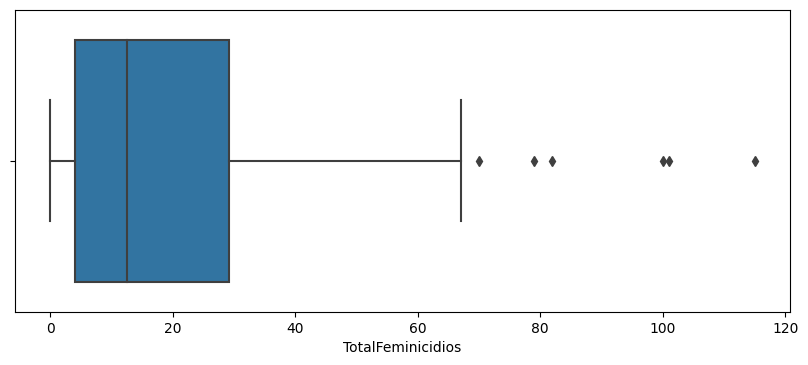

In [ ]:
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(x=tm["TotalFeminicidios"])

Se van a contar cuantos datos estan fuera de los bigotes. La manera de calcular será por medio de matplotlib.

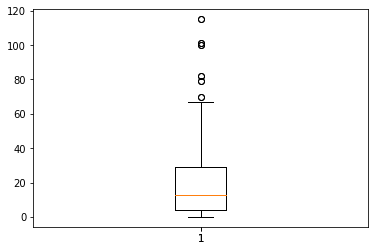

In [ ]:
min = plt.boxplot(tm["TotalFeminicidios"])['whiskers'][0].get_ydata()[1]
max = plt.boxplot(tm["TotalFeminicidios"])['whiskers'][1].get_ydata()[1]

Contamos cuantos registros son atípicos.

In [ ]:
#Total de datos atípicos.
tm[(tm["TotalFeminicidios"]<min) | (tm["TotalFeminicidios"]>max)].shape[0]

6

In [ ]:
#Menores del minimo 
tm[(tm["TotalFeminicidios"]<min)].shape[0]

0

In [ ]:
#Mayores del maximo
tm[(tm["TotalFeminicidios"]>max)].shape[0]

6

Hay 6 estados (en diferentes años) donde hubo mas de 67 feminicidios denunciados. 

# 4. Análisis Exploratorio de Datos

Con anterioridad, fue elaborado un análisis exploratorio de los datos con los que se está trabajando y puede ser encontrado [aquí](https://colab.research.google.com/drive/1MPlpiCCS-ka-G1-arWt77RyWXSzYEQTh?usp=sharing) (Proyecto 2). 

A continuación, se mostrará el uso de métodos de agregación, un suavizado para series de tiempo y un método de reducción de características (PCA, t-SNE,…).

## Método de agregación

Se utilizará la media como método de agregación. 

In [ ]:
FinalData.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


TotalFeminicidios    20.773438
RD                    3.976562
EVDI                  0.140625
EVDV                  0.539062
DESV                  0.000000
CDNB                  1.773438
dtype: float64

## Suavizado para series de tiempo o manejo de datos georeferenciados.

Se realizará un manejo de datos georeferenciados para el total de feminicidios, así como también para el total de reporder de desaparecidad y de encontradas sin vida/se dejaron de buscar.

Se presentará la información en un mapa.

In [ ]:
femin_est = Feminicidios.groupby(by = ['Entidad']).Total.sum().reset_index()
femin_est = pd.DataFrame(femin_est)
femin_est = femin_est.rename(columns ={'Total':'Feminicidios'})
femin_est.head()

,Entidad,Feminicidios
0,Aguascalientes,4
1,Baja California,60
2,Baja California Sur,0
3,Campeche,13
4,Chiapas,118


In [ ]:
desap_est = Desaparecidos.groupby(by = ['Estado']).RD.sum().reset_index()
desap_est = pd.DataFrame(data=desap_est)
desap_est.head()

,Estado,RD
0,AGUASCALIENTES,0
1,BAJA CALIFORNIA,5
2,BAJA CALIFORNIA SUR,1
3,CAMPECHE,0
4,CHIAPAS,5


In [ ]:
DESVest= Desaparecidos.groupby("Estado").sum()["DESV"].reset_index()
DESVest=pd.DataFrame(DESVest)
DESVest = DESVest.rename(columns ={'Estado':'ESTADO'})
DESVest.head(7)

,ESTADO,DESV
0,AGUASCALIENTES,0
1,BAJA CALIFORNIA,0
2,BAJA CALIFORNIA SUR,0
3,CAMPECHE,0
4,CHIAPAS,0
5,CHIHUAHUA,0
6,CIUDAD DE MÉXICO,0


In [ ]:
CDNBest= Desaparecidos.groupby("Estado").sum()["CDNB"].reset_index()
CDNBest=pd.DataFrame(CDNBest)
CDNBest.head(7)

,Estado,CDNB
0,AGUASCALIENTES,0
1,BAJA CALIFORNIA,5
2,BAJA CALIFORNIA SUR,1
3,CAMPECHE,0
4,CHIAPAS,4
5,CHIHUAHUA,0
6,CIUDAD DE MÉXICO,156


In [ ]:
esv_est = pd.concat([DESVest, CDNBest], axis=1)
esv_est.drop(esv_est.columns[[2]], axis=1, inplace=True)
col_listesv= list(esv_est)
esv_est['ESV'] = esv_est[col_listesv].sum(axis=1)
esv_est.drop(['DESV', 'CDNB'], axis = 'columns', inplace=True)
esv_est.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,ESTADO,ESV
0,AGUASCALIENTES,0
1,BAJA CALIFORNIA,5
2,BAJA CALIFORNIA SUR,1
3,CAMPECHE,0
4,CHIAPAS,4


In [ ]:
fem_des_esv = pd.concat([femin_est, desap_est, esv_est], axis=1)
fem_des_esv.drop(['Estado', 'ESTADO'], axis = 'columns', inplace=True)
fem_des_esv = fem_des_esv.rename(columns ={'RD':'Desaparecidas', 'ESV':'Encontradas-s/vida'})
fem_des_esv.head(32)

,Entidad,Feminicidios,Desaparecidas,Encontradas-s/vida
0,Aguascalientes,4,0,0
1,Baja California,60,5,5
2,Baja California Sur,0,1,1
3,Campeche,13,0,0
4,Chiapas,118,5,4
5,Chihuahua,55,0,0
6,Ciudad de México,186,408,156
7,Coahuila de Zaragoza,52,5,5
8,Colima,43,4,4
9,Durango,17,2,2


Una vez unida la información sobre total de feminicidios, reportes de desaparecidas y encontradas sin vida (se dejaron de buscar), se obtendrá el archivo con las coordenadas de cada estado. 

In [ ]:
fem_des_esv = fem_des_esv.replace('Coahuila de Zaragoza','Coahuila')

In [ ]:
fem_des_esv = fem_des_esv.replace('Michoacán de Ocampo','Michoacán')

In [ ]:
fem_des_esv = fem_des_esv.replace('Veracruz de Ignacio de la Llave','Veracruz')

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.7 MB/s 
     |████████████████████████████████| 16.7 MB 2.5 MB/s 
     |████████████████████████████████| 6.3 MB 47.1 MB/s 


In [ ]:
import geopandas as gpd

mexgeojson = "https://raw.githubusercontent.com/melrepa/Proyecto-Integrador-Ing-Car/main/mexico.json"
gdf_est = gpd.read_file(mexgeojson)
gdf_est = gdf_est.rename(columns ={'name':'Entidad'})
gdf_est.drop(gdf_est.columns[[1, 2, 3]], axis=1, inplace=True)
gdf_est = gdf_est.sort_values('Entidad')
gdf_est = gdf_est.reset_index(drop = True)


gdf_est.head()

,Entidad,geometry
0,Aguascalientes,"POLYGON ((-102.77480 21.68780, -102.78830 21.6..."
1,Baja California,"MULTIPOLYGON (((-112.89310 28.67910, -112.8602..."
2,Baja California Sur,"MULTIPOLYGON (((-114.73940 18.37430, -114.7250..."
3,Campeche,"MULTIPOLYGON (((-91.53080 18.77910, -91.51110 ..."
4,Chiapas,"MULTIPOLYGON (((-94.10820 16.05350, -94.10090 ..."


In [ ]:
gdf_est = pd.merge(
    gdf_est, fem_des_esv, how="left", on=['Entidad']
    )
gdf_est.head()


,Entidad,geometry,Feminicidios,Desaparecidas,Encontradas-s/vida
0,Aguascalientes,"POLYGON ((-102.77480 21.68780, -102.78830 21.6...",4,0,0
1,Baja California,"MULTIPOLYGON (((-112.89310 28.67910, -112.8602...",60,5,5
2,Baja California Sur,"MULTIPOLYGON (((-114.73940 18.37430, -114.7250...",0,1,1
3,Campeche,"MULTIPOLYGON (((-91.53080 18.77910, -91.51110 ...",13,0,0
4,Chiapas,"MULTIPOLYGON (((-94.10820 16.05350, -94.10090 ...",118,5,4


In [ ]:
import plotly.express as px

In [ ]:
fig = px.choropleth(data_frame=fem_des_esv, 
                    geojson=mexgeojson, 
                    locations=fem_des_esv['Entidad'], # nombre de la columna del Dataframe
                    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color=fem_des_esv['Feminicidios'], #El color depende de las cantidades
                    color_continuous_scale="hot"
                   )

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.show()

## Reducción de características


Como método de reducción de características se utilizará PCA.

In [ ]:
columnas=['TotalFeminicidios', 'RD', 'EVDI', 'EVDV', 'DESV', 'CDNB']

In [ ]:
FinalDatast = FinalData.groupby(by = ['Entidad']).sum().reset_index()
FinalDatast.head()

,Entidad,TotalFeminicidios,RD,EVDI,EVDV,DESV,CDNB
0,Aguascalientes,4,0,0,0,0,0
1,Baja California,60,5,0,0,0,5
2,Baja California Sur,0,1,0,1,0,1
3,Campeche,13,0,0,0,0,0
4,Chiapas,118,5,0,1,0,4


In [ ]:
reduc_caract=FinalDatast[FinalDatast["TotalFeminicidios"]> 10][columnas]


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
pca_reduc_carac=reduc_caract[['TotalFeminicidios', 'RD', 'EVDI', 'EVDV', 'DESV', 'CDNB']]
pca_reduc_carac.head()

,TotalFeminicidios,RD,EVDI,EVDV,DESV,CDNB
1,60,5,0,0,0,5
3,13,0,0,0,0,0
4,118,5,0,1,0,4
5,55,0,0,0,0,0
6,186,408,9,59,0,156


Aplicamos PCA.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Normalizamos

In [ ]:
scaler = StandardScaler()
pca_reduc_carac_std = scaler.fit_transform(pca_reduc_carac)
pd.DataFrame(pca_reduc_carac_std)

,0,1,2,3,4,5
0,-0.447112,-0.170925,-0.349127,-0.216000,0.0,-0.098319
1,-1.060668,-0.237396,-0.349127,-0.216000,0.0,-0.272554
2,0.310041,-0.170925,-0.349127,-0.124364,0.0,-0.133166
3,-0.512384,-0.237396,-0.349127,-0.216000,0.0,-0.272554
4,1.197739,5.186624,4.826164,5.190551,0.0,5.163600
5,-0.551547,-0.170925,-0.349127,-0.216000,0.0,-0.098319
6,-0.669036,-0.184219,0.225906,-0.216000,0.0,-0.133166
7,-1.008450,-0.210807,-0.349127,-0.216000,0.0,-0.202860
8,-0.407949,-0.224102,-0.349127,-0.124364,0.0,-0.237707
9,-0.238242,-0.184219,0.225906,-0.216000,0.0,-0.202860


Calculamos componentes principales

In [ ]:
pca = PCA()
principalComponents = pca.fit_transform(pca_reduc_carac_std)
pd.DataFrame(principalComponents)

,0,1,2,3,4,5
0,-0.489348,-0.386012,-0.102349,0.090110,0.016577,-0.0
1,-0.718776,-0.950560,0.052001,-0.035865,0.003117,0.0
2,-0.325183,0.340913,-0.239782,0.009499,-0.029645,0.0
3,-0.620154,-0.418009,-0.033288,-0.035970,0.001176,-0.0
4,10.235034,-0.680438,-0.113325,-0.017818,0.000868,-0.0
5,-0.508133,-0.487450,-0.086103,0.090130,0.016947,0.0
6,-0.274505,-0.566617,0.445519,0.045459,-0.002795,-0.0
7,-0.661757,-0.912402,0.020315,0.014562,0.009186,-0.0
8,-0.532352,-0.335926,-0.089456,-0.063528,-0.047133,-0.0
9,-0.231479,-0.139039,0.395484,-0.010043,0.010728,-0.0


Vemos la varianza explicada

In [ ]:
pca.explained_variance_ratio_

array([7.99364735e-01, 1.84174835e-01, 1.56902684e-02, 6.92200726e-04,
       7.79600631e-05, 0.00000000e+00])

El primer componente explica 79% de la varianza.

In [ ]:
import plotly.express as px

In [ ]:
X = FinalDatast[["TotalFeminicidios", "RD", "EVDI", "EVDV", "DESV", "CDNB"]]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=FinalDatast['Entidad'])
fig.show()

In [ ]:
features = ["TotalFeminicidios", "RD", "EVDI", "EVDV", "DESV", "CDNB"]

pca = PCA()
components = pca.fit_transform(FinalDatast[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=FinalDatast["Entidad"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

De forma general, se observa una cantidad muchísimo mayor de feminicidios que de mujeres encontradas sin vida/se dejaron de buscar, lo cual lleva implicito el hecho de que se reportaron como desaparecidas. 
Esto se exceptúa en la Ciudad de México, donde la cantidad de reportes de mujeres desaparecidas encontradas sin vida/se dejaron de buscar es mayor al número de feminicidios denunciados, lo que nos podría indicar que estas mujeres encontradas sin vida tal vez fallecieron por otras razones no relacionadas a feminicidio. 
Es importante recordar que un feminicidio es el asesinato de una mujer por el hecho de serlo, por lo que el asesinato de una mujer que haya estado involucrada en trabajos ilícitos, por ejemplo trata narcotráfico, no se debería considerar como feminicidio. Sin embargo, hay excepciones.
También se puede estimar que el hecho de que haya menor número de denuncias de feminicidios sea porque simplemente no se quiso levantar denuncia, no hubo quien lo hiciera o hubo falta de información o facilidades para llevar a cabo la denuncia. 

# 5. Generación de un conjunto de datos arreglados.

Se llevó a cabo un script de python que incluye la limpieza básica, lee los datos crudos y devuelve los datos acomodados.
Está disponible [aquí](https://raw.githubusercontent.com/melrepa/Proyecto-Integrador-Ing-Car/main/script_mrp.py).

# 6. Visualización de los datos.

Se realizó un Dashboard en [Tableau Public](https://public.tableau.com/app/discover). Está disponible [aquí](https://public.tableau.com/views/Feminicidios_desaparecidas/Fem-Desap?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link).

<img style="float: left;" src="https://raw.githubusercontent.com/melrepa/Proyecto-Integrador-Ing-Car/main/docs/imagenes/Fem-Desap.png">